In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text, ax_text
from matplotlib.colors import LinearSegmentedColormap, NoNorm
from matplotlib import cm
import matplotlib.gridspec as gridspec
import numpy as np
from mplsoccer import PyPizza, add_image, FontManager


from PIL import Image
import urllib
import json
import os
import math

#import modules and packages
import requests
from bs4 import BeautifulSoup
import json
import datetime


In [64]:

# Read CSV as DataFrame called airline_bumping
liga1 = pd.read_csv("/Users/ligandrosy/Downloads/Content.csv")
liga2 = pd.read_csv("/Users/ligandrosy/Downloads/Reactions.csv")
liga3 = pd.read_csv("/Users/ligandrosy/Downloads/ReactionTypes.csv")


In [65]:
liga1


,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...
...,...,...,...,...,...,...
995,995,b4cef9ef-627b-41d7-a051-5961b0204ebb,5b62e10e-3c19-4d28-a57c-e9bdc3d6758d,video,public speaking,NaN
996,996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,4fe420fa-a193-4408-bd5d-62a020233609,GIF,technology,https://socialbuzz.cdn.com/content/storage/7a7...
997,997,435007a5-6261-4d8b-b0a4-55fdc189754b,35d6a1f3-e358-4d4b-8074-05f3b7f35c2a,audio,veganism,https://socialbuzz.cdn.com/content/storage/435...
998,998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,b9bcd994-f000-4f6b-87fc-caae08acfaa1,GIF,culture,https://socialbuzz.cdn.com/content/storage/4e4...


In [66]:
del liga1["Unnamed: 0"]
del liga1["URL"]

In [67]:
liga1

,Content ID,User ID,Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food
...,...,...,...,...
995,b4cef9ef-627b-41d7-a051-5961b0204ebb,5b62e10e-3c19-4d28-a57c-e9bdc3d6758d,video,public speaking
996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,4fe420fa-a193-4408-bd5d-62a020233609,GIF,technology
997,435007a5-6261-4d8b-b0a4-55fdc189754b,35d6a1f3-e358-4d4b-8074-05f3b7f35c2a,audio,veganism
998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,b9bcd994-f000-4f6b-87fc-caae08acfaa1,GIF,culture


In [68]:
liga1["Category"] = liga1["Category"].astype(str)

In [69]:
def turn(x):
    x =x.replace('"', "")
    return x

liga1["Category"]=liga1["Category"].apply(lambda x : turn(x) )

In [70]:
liga1["Category"]

0             Studying
1       healthy eating
2       healthy eating
3           technology
4                 food
            ...       
995    public speaking
996         technology
997           veganism
998            culture
999         technology
Name: Category, Length: 1000, dtype: object

In [71]:
# Changing columns name with index number
liga1= liga1.rename(columns={"Type": 'Content Type'})

In [72]:
liga1

,Content ID,User ID,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food
...,...,...,...,...
995,b4cef9ef-627b-41d7-a051-5961b0204ebb,5b62e10e-3c19-4d28-a57c-e9bdc3d6758d,video,public speaking
996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,4fe420fa-a193-4408-bd5d-62a020233609,GIF,technology
997,435007a5-6261-4d8b-b0a4-55fdc189754b,35d6a1f3-e358-4d4b-8074-05f3b7f35c2a,audio,veganism
998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,b9bcd994-f000-4f6b-87fc-caae08acfaa1,GIF,culture


In [73]:
del liga1["User ID"]

In [74]:
liga2

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
...,...,...,...,...,...
25548,25548,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,2020-06-27 09:46:48
25549,25549,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2021-02-16 17:17:02
25550,25550,75d6b589-7fae-4a6d-b0d0-752845150e56,NaN,interested,2020-09-12 03:54:58
25551,25551,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,2020-11-04 20:08:31


In [75]:
del liga2["Unnamed: 0"]

In [76]:
liga2 = liga2.dropna()


In [77]:
liga2

,Content ID,User ID,Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58
...,...,...,...,...
25547,75d6b589-7fae-4a6d-b0d0-752845150e56,b6d04982-1509-41ab-a700-b390d6cb4d02,worried,2020-10-31 04:50:14
25548,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,2020-06-27 09:46:48
25549,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2021-02-16 17:17:02
25551,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,2020-11-04 20:08:31


In [78]:
del liga2["User ID"]

In [79]:
liga2

,Content ID,Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58
...,...,...,...
25547,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-10-31 04:50:14
25548,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48
25549,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02
25551,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31


In [80]:
liga3

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30
5,5,indifferent,neutral,20
6,6,love,positive,65
7,7,super love,positive,75
8,8,cherish,positive,70
9,9,adore,positive,72


In [81]:
del liga3["Unnamed: 0"]

In [82]:
liga3

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30
5,indifferent,neutral,20
6,love,positive,65
7,super love,positive,75
8,cherish,positive,70
9,adore,positive,72


## Merging

In [83]:
# applying merge with more parameters
# don't run this more than once
liga2 = liga2.merge(liga1[["Content ID",'Category']], left_on="Content ID", right_on="Content ID",how = 'inner')



In [84]:
liga2

,Content ID,Type,Datetime,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,Studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,Studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,Studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,Studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,Studying
...,...,...,...,...
22529,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-10-31 04:50:14,technology
22530,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,technology
22531,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,technology
22532,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,technology


In [85]:
# don't run this more than once
liga2 = liga2.merge(liga3[["Type",'Score']], left_on="Type", right_on="Type",how = 'inner')


In [87]:
liga3 = liga2.copy()

In [88]:
liga3

,Content ID,Type,Datetime,Category,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,Studying,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,Studying,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,Studying,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,healthy eating,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,healthy eating,0
...,...,...,...,...,...
22529,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-10-04 22:26:33,veganism,72
22530,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-09-18 10:50:50,veganism,72
22531,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-10-31 03:58:44,culture,72
22532,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-06-25 15:12:29,culture,72


In [93]:
len(liga3["Category"] == "veganism")

22534

In [94]:
liga3["Category"].max()

'veganism'

In [98]:
# Group by type; calc total weekly sales
liga2 = liga2.groupby("Category")["Score"].sum()

In [99]:
liga2 =liga2.sort_values(ascending=False)

In [61]:
liga2.to_csv("df5.csv")

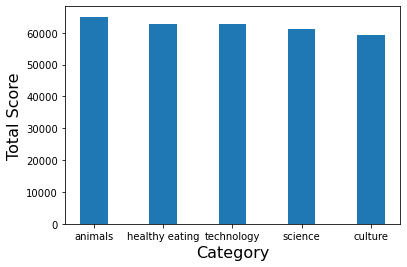

In [114]:
y = liga2.values
y = y[:5]
x = liga2.index
x = x[:5]
plt.bar(x,y,width = 0.4)
plt.ylabel("Total Score",fontsize = 16,color="black")
plt.xlabel("Category",fontsize = 16,color="black")
plt.show() 

In [115]:
liga3

,Content ID,Type,Datetime,Category,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,Studying,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,Studying,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,Studying,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,healthy eating,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,healthy eating,0
...,...,...,...,...,...
22529,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-10-04 22:26:33,veganism,72
22530,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-09-18 10:50:50,veganism,72
22531,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-10-31 03:58:44,culture,72
22532,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-06-25 15:12:29,culture,72


In [123]:
from datetime import datetime

liga3['Datetime'] = pd.to_datetime(liga3['Datetime'] ,infer_datetime_format=True)


In [126]:
liga3["Datetime"]

0       2020-11-07 09:43:50
1       2021-01-06 19:13:01
2       2021-04-09 02:46:20
3       2021-03-28 21:15:26
4       2020-08-04 05:40:33
                ...        
22529   2020-10-04 22:26:33
22530   2020-09-18 10:50:50
22531   2020-10-31 03:58:44
22532   2020-06-25 15:12:29
22533   2020-12-17 16:32:57
Name: Datetime, Length: 22534, dtype: datetime64[ns]

In [134]:
liga3["Month"] = liga3["Datetime"].dt.month

In [135]:
liga3["Month"]

0        11
1         1
2         4
3         3
4         8
         ..
22529    10
22530     9
22531    10
22532     6
22533    12
Name: Month, Length: 22534, dtype: int64

In [137]:
liga4 = liga3.copy()

In [139]:
liga4

,Content ID,Type,Datetime,Category,Score,Month
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,Studying,0,11
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,Studying,0,1
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,Studying,0,4
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,healthy eating,0,3
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,healthy eating,0,8
...,...,...,...,...,...,...
22529,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-10-04 22:26:33,veganism,72,10
22530,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-09-18 10:50:50,veganism,72,9
22531,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-10-31 03:58:44,culture,72,10
22532,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-06-25 15:12:29,culture,72,6


In [140]:
liga4["Count"] = liga4.groupby('Month')['Month'].transform('count')

In [142]:
liga4 =liga4.drop_duplicates(subset=["Month"])

In [144]:
liga4.reset_index()

,index,Content ID,Type,Datetime,Category,Score,Month,Count
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,Studying,0,11,1866
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,Studying,0,1,1949
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,Studying,0,4,1801
3,3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,healthy eating,0,3,1857
4,4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,healthy eating,0,8,1945
5,7,3f8590c7-6ab2-4973-805a-90cdec355f05,disgust,2021-02-11 20:10:20,dogs,0,2,1750
6,8,b18cb63f-4c8e-44ee-a47f-541e95191d11,disgust,2021-05-27 01:44:22,public speaking,0,5,1954
7,11,0be59876-d70c-486c-8e0b-a06bef7a2cd6,disgust,2020-09-11 16:22:49,tennis,0,9,1862
8,12,0be59876-d70c-486c-8e0b-a06bef7a2cd6,disgust,2020-10-13 16:31:34,tennis,0,10,1889
9,13,0be59876-d70c-486c-8e0b-a06bef7a2cd6,disgust,2020-07-23 19:31:31,tennis,0,7,1884


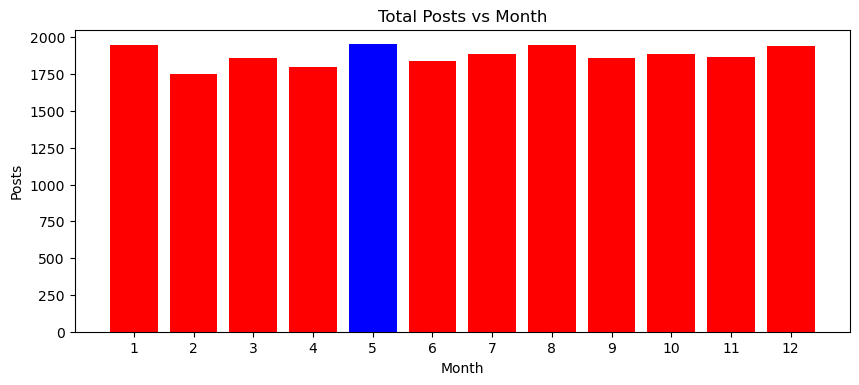

In [181]:
fig = plt.figure(figsize=(10,4), dpi = 100)
ax = plt.subplot()
x = liga4["Month"]
y = liga4["Count"]
ax.set_xticks(np.arange(13))
plt.title("Total Posts vs Month")
plt.xlabel("Month")
plt.ylabel("Posts")
colors = ["red" if i != 5 else "blue" for i in x]
plt.bar(x, y,color=colors) 
plt.show()